In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

dog = pd.read_csv('cani.csv', sep=';', index_col=0, decimal=',')

In [ ]:
###PROBLEMA A

In [3]:
#ESERCIZIO 1: Quanti sono i cani seguiti dall'ambulatorio?
len(dog)

161

In [4]:
#ESERCIZIO 2: Quanti cani soffrono di ipertensione?
len(dog.loc[dog.IP == 'SI',:])
#len(dog[dog['IP'] == 'SI'])

58

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b2ed62e10>]],
      dtype=object)

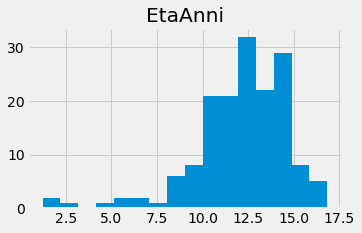

In [11]:
#ESERCIZIO 3.1: Tracciare un istogramma dell'età dei cani
#fissando a un anno l'ampiezza delle classi e considerando gli intervalli chiusi a sinistra e aperti a destra
pd.DataFrame.hist(dog, column="EtaAnni",bins=int(dog["EtaAnni"].max()))
#RIPOSTA 3.1: L'istogramam presenta una assimetria a dx, ciò significa che vengono registrati
#molti cani anziani nell'ambulatorio

In [13]:
#ESERCIZIO 3.2: Compilare la tabella 1, in cui scegliere un opportuno indice
#di centralità e un opportuno indice di dispersione.
dog['EtaAnni'].describe()
#RISPOSTA 3.2: Sceglierei la mediana e la deviazione standard(?)

count    161.000000
mean      12.124658
std        2.627775
min        1.220000
25%       10.890000
50%       12.550000
75%       14.060000
max       16.840000
Name: EtaAnni, dtype: float64

In [32]:
#ESERCIZIO 3.3: Quanti sono i pazienti tra i 12 e i 13 anni?
len(dog.loc[(dog.EtaAnni < 13) & (dog.EtaAnni >= 12)])

32

In [34]:
#ESERCIZIO 3.4: Quanti anni ha il cane più anziano?
dog["EtaAnni"].max()

16.84

In [35]:
#ESERCIZIO 3.5: Qual'è la fascia di età più rappresentata?
#RISPOSTA 3.5: Dal grafico risulta essere la fascia 12-13

In [38]:
#ESERCIZIO 4.1: Quanti cani sono deceduti?
len(dog[dog['MORTE']==1])

118

In [51]:
#ESERCIZIO 4.2: L'operatore ha sempre specifica se la morte è stata cardiaca o no?
number = len(dog)-len(dog[dog["MC"]==0])-len(dog[dog["MC"]==1])
number

46

In [53]:
#ESERCIZIO 4.3: Controllare che non ci siano incongruenze tra cane vivo ma con morte cardiaca a 1
len(dog.loc[(dog.MC == 1) & (dog.MORTE == 0)])

0

In [54]:
#ESERCIZIO 4.4: Quanti cani sono deceduti per cause cardiache?
len(dog[dog["MC"]==1])

87

In [61]:
#ESERCIZIO 4.5: Tra le morti avvenute, quale percentuale è stata per cause cardiache?
print((len(dog[dog["MC"]==1])/len(dog[dog["MORTE"]==1]))*100,"%")

73.72881355932203 %


In [62]:
#ESERCIZIO 5.1: GravitaIP è scalare, ordinale o nominale?
#RISPOSTA 5.1: E' ordinale

In [63]:
#ESERCIZIO 5.2: GravitaIP quali valori può assumere?
dog["GravitaIP"].unique()

array([0, 1, 2, 3])

In [86]:
#ESERCIZIO 5.3: Produrre la tabella delle frequenze relative di GravitaIP
freq_rel = dog["GravitaIP"].value_counts()/len(dog)
print(freq_rel)

0    0.639752
1    0.180124
2    0.111801
3    0.068323
Name: GravitaIP, dtype: float64


0    0.639752
1    0.180124
2    0.111801
3    0.068323
Name: GravitaIP, dtype: float64


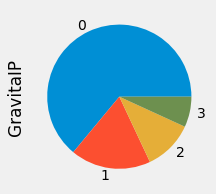

In [87]:
#ESERCIZIO 5.4: Tracciare un grafico opportuno per descrivere GravitaIP
print(freq_rel)
plt = freq_rel.plot.pie()

In [88]:
#ESERCIZIO 6.1: Produrre la tabella delle frequenze assolute del carattere Antiaritmico
dog["Antiaritmico"].value_counts()

NO    150
SI     11
Name: Antiaritmico, dtype: int64

In [89]:
#ESERCIZIO 6.2: Quanti sono i cani che assumono un farmaco antiaritmico?
#RISPOSTA 6.2: 11

In [90]:
#ESERCIZIO 6.3: Con quale valore numerico mettereste in corrispondenza il SI e con quale il NO?
#RISPOSTA 6.3: 0 per NO, 1 per SI

In [95]:
#ESERCIZIO 6.4: Produrre la tabella delle frequenze assolute congiunte dei caratteri Antiaritmico e MC
freq_cong = pd.crosstab(dog["Antiaritmico"], dog["MC"])
freq_cong

MC,0.0,1.0
Antiaritmico,,
NO,28,78
SI,0,9


In [100]:
#ESERCIZIO 6.5: Quale percentuale dei cani morti per cause cardiache assumeva un farmaco antiritmico?
morti_cardiache = len(dog[dog["MC"]==1])
casi_morti_aritmiche = freq_cong.loc["SI",1]
print((casi_morti_aritmiche/morti_cardiache)*100,'%')

10.344827586206897 %


In [106]:
#ESERCIZIO 7.1: Quale percentuale di cani tuttora vivi è in cura presso l'ambulatorio da meno di un anno?
tot_cani_vivi = len(dog[dog["MORTE"]==0])
cani_anno = len(dog.loc[(dog.MORTE == 0) & (dog.SURVIVALTIME <= 365)])
print((cani_anno*100)/tot_cani_vivi,'%')

65.11627906976744 %


In [108]:
#ESERCIZIO 7.2: Quale percentuale di cani deceduti è sopravvissuta più di 3 anni?
tot_cani_morti = len(dog[dog["MORTE"]==1])
cani_morti_3anni = len(dog.loc[(dog.MORTE == 1) & (dog.SURVIVALTIME >= 365*3)])
print((cani_morti_3anni*100)/tot_cani_morti,"%")

10.169491525423728 %


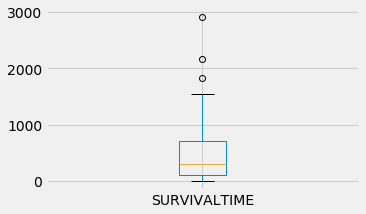

In [112]:
#ESERCIZIO 7.3: Tracciare un grafico opportuno per descrivere il tempo di sopravvivenza
dog["SURVIVALTIME"].plot.box()

In [121]:
#ESERCIZIO 7.4: Completare la figura 2a con il valore numerico degli estremi della scatola
print("25%:",dog["SURVIVALTIME"].quantile(0.25))
print("75%:",dog["SURVIVALTIME"].quantile(0.75))

25%: 113.0
75%: 711.0


In [128]:
#ESERCIZIO 7.5: Quanti animali sono compresi all'interno della scatola (estremi inclusi)?
box_dog = dog.loc[(dog.SURVIVALTIME >= 113) & (dog.SURVIVALTIME <= 711)]
len(box_dog)

81

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b2a68ae90>]],
      dtype=object)

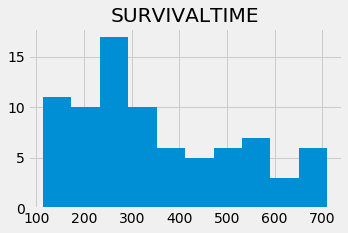

In [131]:
#ESERCIZIO 7.6: Tracciare una grafico opportuno diverso dal boxplot che descriva il tempo di sopr. dei cani
pd.DataFrame.hist(box_dog, column="SURVIVALTIME")

In [132]:
#ESERCIZIO 7.7: Suggerite un modello teorico per la variabile aleatoria X="Tempo di sopravvivenza dei cani che frequentano l'ambulatorio"


In [133]:
#ESERCIZIO 7.8: Calcolate il tempo di sopravvivenza medio
print(dog["SURVIVALTIME"].mean())

459.888198757764


In [134]:
#ESERCIZIO 7.9: Calcolate la deviazione standard del tempo di sopravvivenza
print(dog["SURVIVALTIME"].std())

467.1967063479367


In [136]:
#ESERCIZIO 8.1: Controllare se Allodiast può essere considerato normale


In [142]:
#ESERCIZIO 8.2: Controllare che nell'intervallo di semi ampiezza 2 deviazioni standard e centrato sulla media risiede circa il 96%
#delle osservazioni per tale carattere.
tot_dogs = len(dog)
std = dog["Allodiast"].std()
mean = dog["Allodiast"].mean()
number_dogs = len(dog.loc[(dog.Allodiast >= mean-(2*std)) & (dog.Allodiast <= mean+(2*std))])
print((number_dogs/tot_dogs)*100,"%")
#RISPOSTA 8.2: Si, vi risiede poco più del 96% delle osservazioni

96.27329192546584 %


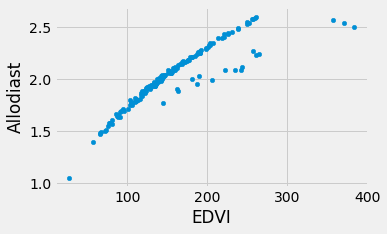

In [144]:
#ESERCIZIO 9: I caratteri EDVI e Allodiast sono indipendenti?
dog.plot.scatter("EDVI","Allodiast")
#RISPOSTA 9: Sono dipendenti per la maggior parte dei valori osservati

In [145]:
###PROBLEMA B

In [149]:
cani_morti = dog.loc[(dog.MORTE==1) & (dog.MC.notna()) & (dog.OndaEA.notna())]

In [150]:
#ESERCIZIO 1: L'OndaEA è un carattere scalare oppure ordinale?
#RISPOSTA 1: E' uno scalare

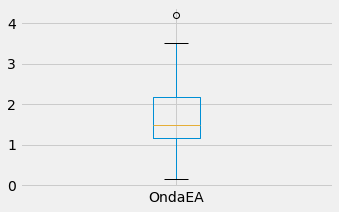

In [153]:
#ESERCIZIO 2: Produrre il boxplot relativo al carattere OndaEA
cani_morti["OndaEA"].plot.box()

In [154]:
#ESERCIZIO 3: Il grafico ottenuto dovrebbe mostrare la presenza di un outlier.
#Determinare il valore di tale outlier
cani_morti["OndaEA"].max()

4.19

In [156]:
#ESERCIZIO 4: L'outlier è un cane morto per cause cardiache oppure no?
cani_morti.loc[(cani_morti.OndaEA == 4.19) & (cani_morti.MC == 1)]
#RISPOSTA 4: Mi ha restituito un risultato, quindi si, il cane è morto per cause cardiache

,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
Cartella,,,,,,,,,,,,,,,,,,,
F0603,SI,2,13.4,1,1.0,248,3,SI,14.5,3.59,3.17,1.8,4.19,63.0,34.0,176.34,65.29,2.18,1.44


In [159]:
#ESERCIZIO 5: Si controlli che il terzo quartile "s" dell'OndaEA per i cani deceduti per cause non cardiache è 1.41
non_card = cani_morti.loc[cani_morti.MC == 0]
s = non_card["OndaEA"].quantile(0.75)
s
#RISPOSTA 5: Si, è 1.41

1.41

In [160]:
#ESERCIZIO 6: Quanti sono i cani deceduti per cause cardiache? Quanti per altre cause?
cani_morti["MC"].value_counts()

1.0    66
0.0    17
Name: MC, dtype: int64

In [164]:
#ESERCIZIO 7: Quanti cani deceduti per cause cardiache avevano il valore di OndaEA >= s?
#E quanti cani deceduti per cause non cardiache avevano il valore di OndaEA < s?
print("OndaEA >= s:",len(cani_morti.loc[(cani_morti.MC == 1) & (cani_morti.OndaEA >= s)]))
print("OndaEA < s:",len(cani_morti.loc[(cani_morti.MC == 0) & (cani_morti.OndaEA < s)]))

OndaEA >= s: 41
OndaEA < s: 12


In [165]:
#ESERCIZIO 8: 

In [ ]:
#ESERCIZIO 9: